Generate a complete network with 100 nodes and calculate the hitting time distribution:

In [1]:
import os
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
n = 100 #number of nodes

In [2]:
#adjacency matrix for complete network
A = np.ones((n,n))  
np.fill_diagonal(A, 0)

In [3]:
def hitting_matrix(A_matrix):
    L = np.size(A_matrix,axis = 0)
    np.fill_diagonal(A_matrix, 0)

    D_matrix = np.zeros((L,L))
    D_inv = np.zeros((L,L))
    D_sqrt = np.zeros((L,L))
    D_sqrt_inv = np.zeros((L,L))
    for i in range(L):
        D_matrix[i,i] = np.sum(A_matrix[i])
        D_inv[i,i] = 1./D_matrix[i,i]
        D_sqrt[i,i] = np.sqrt(D_matrix[i,i])
        D_sqrt_inv[i,i] = 1./D_sqrt[i,i]

    p_matrix = np.dot(D_inv, A_matrix)
    eye_matrix = np.eye(L,L)
    eye_P = eye_matrix - p_matrix

    G_Lap = np.dot(D_sqrt,eye_P)
    G_Lap_n = np.dot(G_Lap, D_sqrt_inv)

    N_1 = np.dot(D_sqrt_inv,A_matrix)
    N_matrix = np.dot(N_1, D_sqrt_inv)
    lap_matrix = D_matrix - A_matrix
    [eig_val, eig_vec] = np.linalg.eigh(G_Lap_n)
    H = np.zeros((L,L))
    d = np.sum(D_matrix)
    for i in range(L):
        for j in range(L):
            deg_i = D_matrix[i,i]
            deg_j = D_matrix[j,j]
            for k in range(L):
                if eig_val[k] != min(eig_val):
                    t_i = (eig_vec[i,k]*eig_vec[i,k])/deg_i
                    t_j = (eig_vec[j,k]*eig_vec[j,k])/deg_j
                    t_ij = (eig_vec[i,k]*eig_vec[j,k])/np.sqrt(deg_i*deg_j)
                    H[i,j] = H[i,j] + d*(1./(eig_val[k]))*(t_j-t_ij)

    H = np.transpose(H)
    return H

In [4]:
H = hitting_matrix(A)
print H

[[  0.  99.  99. ...,  99.  99.  99.]
 [ 99.   0.  99. ...,  99.  99.  99.]
 [ 99.  99.   0. ...,  99.  99.  99.]
 ..., 
 [ 99.  99.  99. ...,   0.  99.  99.]
 [ 99.  99.  99. ...,  99.   0.  99.]
 [ 99.  99.  99. ...,  99.  99.   0.]]


In [5]:
def reshape_no_diag(input_matrix):
    L = np.size(input_matrix, axis = 0)
    H_vec = np.reshape(H, (1, L*L))
    for i in reversed(xrange(L)):
        H_vec = np.delete(H_vec, i*L+i)
    return H_vec

/Users/pariarezaeinia/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


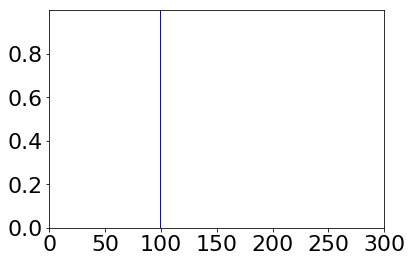

In [7]:
font = {'family': 'Arial',
        'color':  'darkred',
        'weight': 'normal',
        'size': 13,
        }
fig, ax = plt.subplots()
n, bins, patches = ax.hist(H_vec, 5, normed = 1, edgecolor='b')
plt.yticks(np.arange(0, 1, step=0.2))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)
plt.axis([0, 300, 0, 1])
plt.show()